# Looking at Protests with ICEWS Data

A lot of this is adapted from [David Masad's work](https://gist.github.com/dmasad/f79ce5abfd4fb61d253b)


In [190]:
import os
from collections import defaultdict

# Other libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
# Show plots inline
%matplotlib inline

# Downloading the data

The ICEWS yearly data is available at the [Harvard Dataverse](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/28075).

# Loading the data

In [2]:
# Path to directory where the data is stored
data_loc = "\Box Sync\Research\Inequality\Data\ICEWS"

In [ ]:
cur_dir

In [4]:
full_path = cur_dir + data_loc + '\\'

In [141]:
all_events = []

for f in os.listdir(full_path):
    if f[-3:] == 'tab':
        for g in os.listdir(full_path + f):
            print g
            # add parse_dates to read the second column as a date
            df = pd.read_csv(full_path + f + '\\' + g, sep='\t', parse_dates=[1])
            #add underscore in case you want to use Pandas period notation
            cols = {col: col.replace(" ", "_") for col in df.columns}
            df.rename(columns=cols, inplace=True)
            all_events.append(df)

events.1995.20150313082510.tab
events.1996.20150313082528.tab
events.1997.20150313082554.tab
events.1998.20150313082622.tab
events.1999.20150313082705.tab
events.2000.20150313082808.tab
events.2001.20150313082922.tab
events.2002.20150313083053.tab
events.2003.20150313083228.tab
events.2004.20150313083407.tab
events.2005.20150313083555.tab
events.2006.20150313083752.tab
events.2007.20150313083959.tab
events.2008.20150313084156.tab
events.2009.20150313084349.tab
events.2010.20150313084533.tab
events.2011.20150313084656.tab
events.2012.20150313084811.tab
events.2013.20150313084929.tab
events.2014.20160121105408.tab
events.2015.20160708082017.tab


##### Note: Concatenating the year files into one dataframe (next cell) takes a really long time. And exporting gives you a 9 GB file.

In [ ]:
events_allyears = pd.concat(all_events)

In [56]:
#events_allyears.to_csv(full_path + 'events_allyears_v1.csv')

In [48]:
all_protests = []

for f in os.listdir(full_path):
    if f[-3:] == 'tab':
        for g in os.listdir(full_path + f):
            print g
            df = pd.read_csv(full_path + f + '\\' + g, sep='\t', parse_dates=[1])
            cols = {col: col.replace(" ", "_") for col in df.columns}
            df.rename(columns=cols, inplace=True)
            # convert number (for CAMEO code) to string; should've done this on import
            def cam_str(num):
                return str(num)
            # create column with protest_dummy
            def cam_protest(text):
                code = text[:2]
                if code == '14':
                    return 1
                else:
                    return 0
            df['CAMEO_str'] = df['CAMEO_Code'].apply(cam_str)
            df['protest_dummy'] = df['CAMEO_str'].apply(cam_protest)
            # get subset of data (just protests)
            protest_data = df[df['protest_dummy'] == 1]
            all_protests.append(protest_data)

events.1995.20150313082510.tab
events.1996.20150313082528.tab
events.1997.20150313082554.tab
events.1998.20150313082622.tab
events.1999.20150313082705.tab
events.2000.20150313082808.tab
events.2001.20150313082922.tab
events.2002.20150313083053.tab
events.2003.20150313083228.tab
events.2004.20150313083407.tab
events.2005.20150313083555.tab
events.2006.20150313083752.tab
events.2007.20150313083959.tab
events.2008.20150313084156.tab
events.2009.20150313084349.tab
events.2010.20150313084533.tab
events.2011.20150313084656.tab
events.2012.20150313084811.tab
events.2013.20150313084929.tab
events.2014.20160121105408.tab
events.2015.20160708082017.tab


In [ ]:
protests_allyears = pd.concat(all_protests)

In [56]:
#protests_allyears.to_csv(full_path + 'protests_allyears_v1.csv')

In [6]:
#events_allyears = pd.read_csv(full_path + 'events_allyears_v1.csv')

In [34]:
#protests_allyears = pd.read_csv(full_path + 'protests_allyears_v1.csv')

In [41]:
# convert to datetime format for analysis (if importing from .csv)

protests_allyears['Event_Date'] =  pd.to_datetime(protests_allyears['Event_Date'], format='%Y-%M-%d')

In [ ]:
# add year and month columns (can do this if Event_Date column is in datetime format)

protests_allyears['year'] = protests_allyears['Event_Date'].dt.year

protests_allyears['month'] = protests_allyears['Event_Date'].dt.month

In [12]:
# convert to datetime for other dataframe

events_allyears['Event_Date'] =  pd.to_datetime(events_allyears['Event_Date'], format='%Y-%M-%d')

In [18]:
# again, add month and year columns

events_allyears['year'] = events_allyears['Event_Date'].dt.year

events_allyears['month'] = events_allyears['Event_Date'].dt.month

### Quick look at data

In [81]:
protests_allyears.columns

Index([u'Unnamed: 0', u'Event_ID', u'Event_Date', u'Source_Name',
       u'Source_Sectors', u'Source_Country', u'Event_Text', u'CAMEO_Code',
       u'Intensity', u'Target_Name', u'Target_Sectors', u'Target_Country',
       u'Story_ID', u'Sentence_Number', u'Publisher', u'City', u'District',
       u'Province', u'Country', u'Latitude', u'Longitude', u'CAMEO_str',
       u'protest_dummy', u'year', u'month'],
      dtype='object')

#### All events data (for all 21 years) has 14.7 million records; protests subset has about 375,000 records

In [210]:
print protests_allyears.shape
print events_allyears.shape

(375384, 25)
(14715575, 23)


In [212]:
# look at data types of variables

events_allyears.dtypes.head()

Unnamed: 0                 int64
Event_ID                   int64
Event_Date        datetime64[ns]
Source_Name               object
Source_Sectors            object
dtype: object

In [208]:
protests_allyears.head(2)

,Unnamed: 0,Event_ID,Event_Date,Source_Name,Source_Sectors,Source_Country,Event_Text,CAMEO_Code,Intensity,Target_Name,...,City,District,Province,Country,Latitude,Longitude,CAMEO_str,protest_dummy,year,month
0,12,926701,1995-01-01 00:01:00,Protester (Mexico),"Protestors / Popular Opposition / Mobs,Dissident",Mexico,Demonstrate for leadership change,1411,-6.5,Governor (Mexico),...,Tabasco,Jose Maria Morelos,Estado de Quintana Roo,Mexico,19.9786,-88.6850,1411,1,1995,1
1,21,926711,1995-01-01 00:01:00,Main Opposition (Mexico),"Protestors / Popular Opposition / Mobs,Dissident",Mexico,Consider policy option,14,0.0,Carlos Salinas De Gortari,...,NaN,NaN,NaN,Mexico,19.4285,-99.1277,14,1,1995,1


In [213]:
# how many events per year?

events_allyears['year'].value_counts().head(10)

2006    1118996
2005    1013400
2007    1011161
2008     980879
2004     953820
2009     857511
2003     850489
2014     837053
2002     825060
2001     797924
Name: year, dtype: int64

In [32]:
# describe Country column. 14.7 million rows. Over 900,000 rows about India.

events_allyears['Country'].describe()

count     14713550
unique         250
top          India
freq        929299
Name: Country, dtype: object

#### Need data in country-year format to do some analysis

In [46]:
# pivot data to get country, year, and number of protests columns

protests_country_year = protests_allyears.pivot_table(index=['Country', 'year'], values='Event_ID', \
                                           dropna=False, aggfunc=len, fill_value=0)

# reset index to get output in next cell
protests_country_year = protests_country_year.reset_index()

In [50]:
protests_country_year.head(2)

,level_0,level_1,Event_ID
0,Afghanistan,1995,11
1,Afghanistan,1996,20


In [51]:
# rename columns

protests_country_year.rename(columns={'level_0' : 'country', 'level_1' : 'year', 'Event_ID' : 'protests'}, inplace=True)

In [52]:
# save, if need be

#protests_country_year.to_csv(full_path + 'protests_country_year_v1.csv')

In [24]:
# again, pivot data and reset index

events_country_year = events_allyears.pivot_table(index=['Country', 'year'], values='Event_ID', dropna=False, aggfunc=len, fill_value=0)

events_country_year = events_country_year.reset_index()

In [26]:
events_country_year.head(2)

,level_0,level_1,Event_ID
0,Afghanistan,1995,987
1,Afghanistan,1996,2306


In [27]:
# rename columns

events_country_year.rename(columns={'level_0' : 'country', 'level_1' : 'year', 'Event_ID' : 'all_events'}, inplace=True)

In [30]:
# save to csv, if need be

#events_country_year.to_csv(full_path + 'events_country_year_v1.csv')

In [49]:
# pivoted table has 5250 rows (each row is a country-year data point)

events_country_year.shape

(5250, 3)

In [29]:
events_country_year['all_events'].describe()

count     5250.000000
mean      2802.580952
std       6751.630031
min          0.000000
25%         30.000000
50%        477.000000
75%       2341.500000
max      91983.000000
Name: all_events, dtype: float64

In [33]:
# compare pivot table to original table; count * mean gives us the number of rows in the original table

2802.580952 * 5250

14713549.998

In [252]:
# merge both pivoted tables (1. all events and 2. all protests); how='left' means that nothing from the first table (events-countries) will be dropped

protests_all_events = pd.merge(events_country_year, protests_country_year, on=None, left_on=['country', 'year'], \
                              right_on=['country', 'year'], how='left')

#### Now we have a country-year dataframe that has the total number of events and the number or protests

In [253]:
# add column with proportion of all events that are protests

protests_all_events['prop_protests'] = protests_all_events['protests'] / protests_all_events['all_events']

In [59]:
protests_all_events.head()

,country,year,all_events,protests,prop_protests
0,Afghanistan,1995,987,11,0.011145
1,Afghanistan,1996,2306,20,0.008673
2,Afghanistan,1997,1582,5,0.003161
3,Afghanistan,1998,2451,18,0.007344
4,Afghanistan,1999,2533,46,0.018160


#### Create more columns

In [254]:
# average proportion of events that are protests, by year

protests_all_events['prop_protests_all_countries'] = protests_all_events.groupby('year')['prop_protests'].transform(lambda x: x.mean())

In [255]:
# total number of events over all years, by country

protests_all_events['all_events_country'] = protests_all_events.groupby('country')['all_events'].transform(lambda x: x.sum())

In [256]:
# total number of protests over all years, by country

protests_all_events['all_protests_country'] = protests_all_events.groupby('country')['protests'].transform(lambda x: x.sum())

In [257]:
# proportion of all events that are protests over all years, by country

protests_all_events['prop_all_years_country'] = protests_all_events['all_protests_country'] / protests_all_events['all_events_country']

In [258]:
protests_all_events.head(1)

,country,year,all_events,protests,prop_protests,prop_protests_all_countries,all_events_country,all_protests_country,prop_all_years_country
0,Afghanistan,1995,987,11,0.011145,0.031669,285271,4844,0.01698


In [260]:
# export to .csv before filtering

protests_all_events.to_csv(full_path + 'protests_events_country_year_v1.csv')

#### Let's look at data, sorted by which country has the highest proportion of events that are protests.

In [259]:
protests_all_events.sort_values(by='prop_all_years_country', ascending=False).head(2)

,country,year,all_events,protests,prop_protests,prop_protests_all_countries,all_events_country,all_protests_country,prop_all_years_country
3875,Saint Barthelemy,2006,0,0,NaN,0.026770,5,1,0.2
3884,Saint Barthelemy,2015,2,0,0,0.031052,5,1,0.2


#### Some countries have very few events, so I want to just keep countries that have at least 1,000 events over the 21 years (about 47.6 events per year).

In [261]:
protests_all_events = protests_all_events[protests_all_events['all_events_country'] > 999]

In [262]:
# dataset went from 5250 country-years to 3864 (which means there are now 184 countries in the dataset)

protests_all_events.shape

(3864, 9)

#### Next cell gives us stats for proportion column. The average is 0.028 and median is 0.018, which seems to make sense.

In [264]:
protests_all_events['prop_protests'].describe()

count    3860.000000
mean        0.027896
std         0.034876
min         0.000000
25%         0.008260
50%         0.017544
75%         0.033113
max         0.354664
Name: prop_protests, dtype: float64

### Plotting

#### Let's start by looking big picture: number of all protests globally by day and year

In [215]:
#daily_events = protests_allyears.groupby("Event_Date").aggregate(len)["Event_ID"]

yearly_events = protests_allyears.groupby('year').aggregate(len)["Event_ID"]

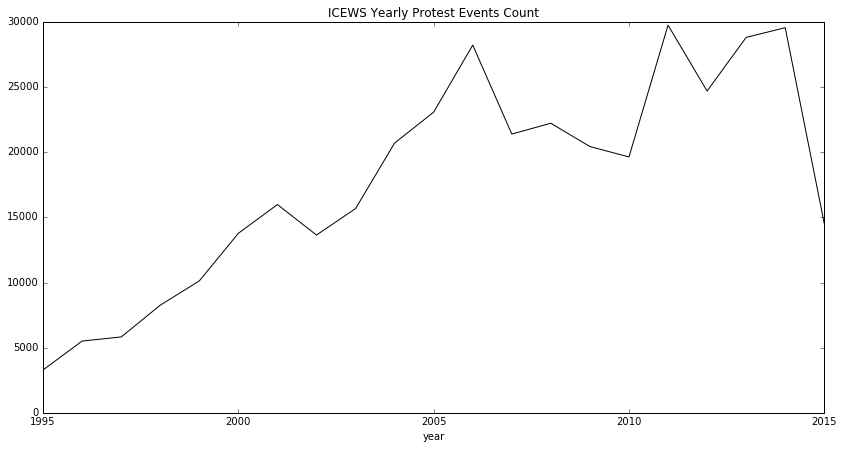

In [242]:
yearly_events.plot(color='k', lw=1, figsize=(14,7), 
                  title="ICEWS Yearly Protest Events Count")

#### Proportion of events that are protests over time

In [265]:
# pivot table that will give us the proportion of all events that are protests for all countries, by year

prop_prot_year = protests_all_events.pivot_table(index='year', values='prop_protests_all_countries', dropna=False, aggfunc=np.mean, fill_value=0)

In [266]:
prop_prot_year.sort_values(ascending=False).head()

year
2011    0.044427
2012    0.035839
2013    0.034254
2014    0.032998
1995    0.031669
Name: prop_protests_all_countries, dtype: float64

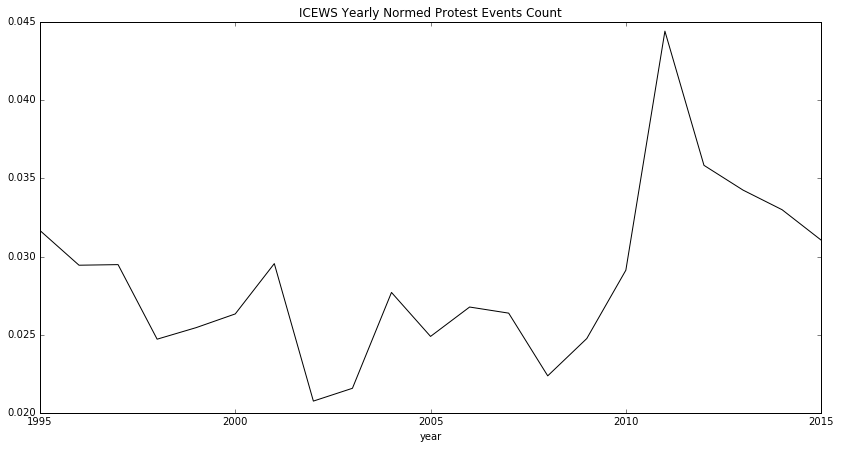

In [267]:
prop_prot_year.plot(color='k', lw=1, figsize=(14,7), 
                  title="ICEWS Yearly Normed Protest Events Count")

#### We can also look at protest proportions by country

In [268]:
# pivot table that will give us the proportion of all events that are protests for all years, by country

prop_prot_country = protests_all_events.pivot_table(index='country', values='prop_all_years_country', dropna=False, aggfunc=np.mean, fill_value=0)

In [269]:
# top 10 countries

prop_prot_country.sort_values(ascending=False).head(10)

country
Bahrain       0.136910
Hong Kong     0.109188
Swaziland     0.094176
Tunisia       0.087548
Bolivia       0.087028
Haiti         0.080759
Guinea        0.076485
Mauritania    0.075507
Madagascar    0.072920
Nepal         0.071605
Name: prop_all_years_country, dtype: float64

### Let's look at a subset of the countries. The first is for a few countries in Europe, the second for some MENA countries.

In [270]:
protests_all_events.head(1)

,country,year,all_events,protests,prop_protests,prop_protests_all_countries,all_events_country,all_protests_country,prop_all_years_country
0,Afghanistan,1995,987,11,0.011145,0.031669,285271,4844,0.01698


In [281]:
all_pivot = protests_all_events.pivot('year', 'country')

In [283]:
all_pivot.head(2)

all_events                                                     \
country Afghanistan Albania Algeria Angola Argentina Armenia Australia   
year                                                                     
1995            987     447     809    622       980     124      1133   
1996           2306    1226     901    915      1496     423      4027   

                                                      ...                     \
country Austria Azerbaijan Bahamas                    ...                      
year                                                  ...                      
1995        477        346      12                    ...                      
1996        668        381      14                    ...                      

        prop_all_years_country                                          \
country                Uruguay Uzbekistan   Vanuatu Venezuela  Vietnam   
year                                                                     
1995                  0.020029   0.013766  0.009844  0.059967  0.00495   
1996                  0.020029   0.013766  0.009844  0.059967  0.00495   

                                                      \
country Western Sahara     Yemen    Zambia  Zimbabwe   
year                                                   
1995          0.032031  0.056582  0.020601  0.030197   
1996          0.032031  0.056582  0.020601  0.030197   

                                                   
country the former Yugoslav Republic of Macedonia  
year                                               
1995                                     0.022563  
1996                                     0.022563  

[2 rows x 1288 columns]

In [284]:
all_pivot.to_excel(full_path + 'country_year_pivot_v1.xlsx')

In [285]:
all_pivot.to_csv(full_path + 'country_year_pivot_v1.csv')

In [271]:
europe_test = protests_all_events[(protests_all_events['country'] == 'France') | (protests_all_events['country'] == 'Germany') \
                                    | (protests_all_events['country'] == 'Italy') | (protests_all_events['country'] == 'Spain') \
                                    | (protests_all_events['country'] == 'Greece') | (protests_all_events['country'] == 'Austria')] \
[['country', 'year', 'all_events', 'protests', 'prop_protests', 'prop_all_years_country']]

In [272]:
mena_test = protests_all_events[(protests_all_events['country'] == 'Bahrain') | (protests_all_events['country'] == 'Syria') \
                                    | (protests_all_events['country'] == 'Tunisia') | (protests_all_events['country'] == 'Egypt') \
                                    | (protests_all_events['country'] == 'Iraq') | (protests_all_events['country'] == 'Jordan')] \
[['country', 'year', 'all_events', 'protests', 'prop_protests', 'prop_all_years_country']]

In [273]:
europe_test.head(2)

,country,year,all_events,protests,prop_protests,prop_all_years_country
273,Austria,1995,477,9,0.018868,0.011728
274,Austria,1996,668,10,0.014970,0.011728


In [274]:
# pivot tables that'll give us multi-level tables (variables and countries for column headings, years for row headings). 
#This'll make it easier to plot.

europe_pivot = europe_test.pivot('year', 'country')

mena_pivot = mena_test.pivot('year', 'country')

In [275]:
europe_pivot.head(2)

all_events                                   protests                 \
country    Austria France Germany Greece Italy Spain  Austria France Germany   
year                                                                           
1995           477   5862    2111    966  1752  1345        9    172      36   
1996           668   6927    3353   1039  3204  1583       10    187      88   

                  ...    prop_protests                                \
country Greece    ...          Germany    Greece     Italy     Spain   
year              ...                                                  
1995        16    ...         0.017054  0.016563  0.009703  0.015613   
1996        13    ...         0.026245  0.012512  0.019663  0.021478   

        prop_all_years_country                                          \
country                Austria    France   Germany    Greece     Italy   
year                                                                     
1995                  0.011728  0.025018  0.020167  0.044598  0.023448   
1996                  0.011728  0.025018  0.020167  0.044598  0.023448   

                   
country     Spain  
year               
1995     0.034579  
1996     0.034579  

[2 rows x 24 columns]

In [276]:
mena_pivot.head(2)

all_events                                  protests             \
country    Bahrain Egypt  Iraq Jordan Syria Tunisia  Bahrain Egypt Iraq   
year                                                                      
1995           113  3235  1763   1066  2098     405        9    34   23   
1996           615  4987  3989   1560  3981     401       46    21   18   

                  ...    prop_protests                               \
country Jordan    ...             Iraq    Jordan    Syria   Tunisia   
year              ...                                                 
1995         5    ...         0.013046  0.004690  0.00572  0.004938   
1996        35    ...         0.004512  0.022436  0.00201  0.000000   

        prop_all_years_country                                         \
country                Bahrain    Egypt      Iraq    Jordan     Syria   
year                                                                    
1995                   0.13691  0.05982  0.019343  0.026362  0.025236   
1996                   0.13691  0.05982  0.019343  0.026362  0.025236   

                   
country   Tunisia  
year               
1995     0.087548  
1996     0.087548  

[2 rows x 24 columns]

### Total number of protests for some European countries, 1995 - 2015

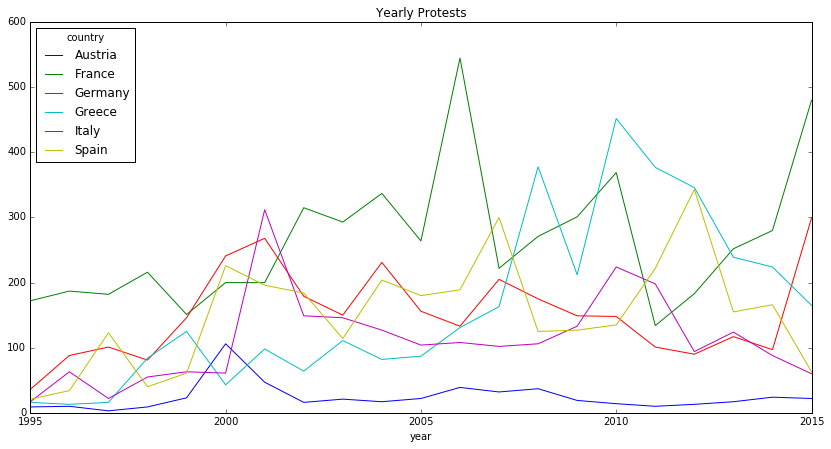

In [277]:
europe_pivot['protests'].plot(figsize=(14,7), lw=1,
                             title="Yearly Protests")

### Normed number of protests for some European countries, 1995 - 2015

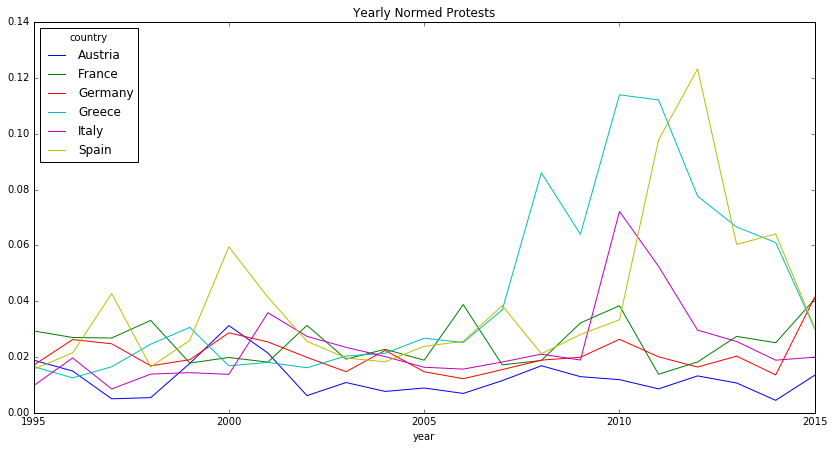

In [278]:
europe_pivot['prop_protests'].plot(figsize=(14, 7), lw=1,
                             title="Yearly Normed Protests")

### Two plots of MENA protests (total and normed), 1995 - 2015

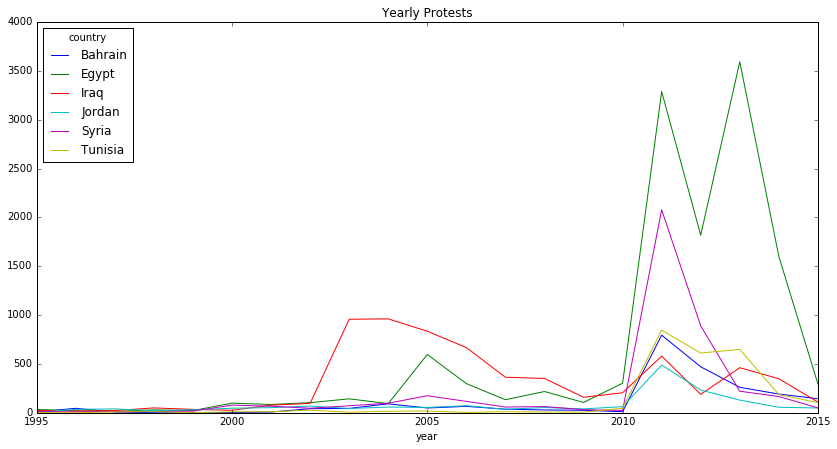

In [279]:
mena_pivot['protests'].plot(figsize=(14, 7), lw=1,
                             title="Yearly Protests")

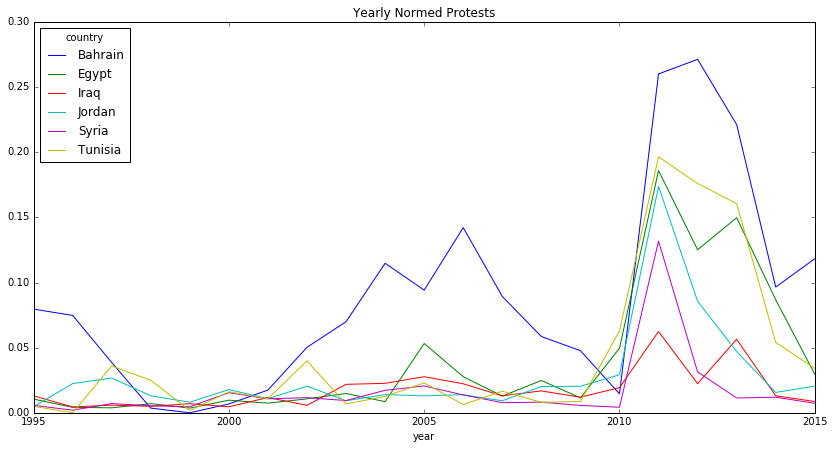

In [280]:
mena_pivot['prop_protests'].plot(figsize=(14, 7),  lw=1,
                             title="Yearly Normed Protests")

### Who are the main actors?

#### First, let's look at which countries are most often the "source" and the target of protest.

In [61]:
country_source = protests_allyears.Source_Country.value_counts()
country_target = protests_allyears.Target_Country.value_counts()
country_counts = pd.DataFrame({"SourceFreq": country_source,
                             "TargetFreq": country_target})
country_counts.fillna(0, inplace=True)
country_counts["Total"] = country_counts.SourceFreq + country_counts.TargetFreq

In [64]:
country_counts.sort_values(by="TargetFreq", ascending=False, inplace=True)
country_counts.head(10)

,SourceFreq,TargetFreq,Total
India,43053,16617,59670
United States,14453,6411,20864
Egypt,12887,6304,19191
Thailand,13649,5825,19474
Israel,4983,5815,10798
Russian Federation,10513,4352,14865
Turkey,8220,4275,12495
China,8102,3510,11612
Indonesia,8330,3315,11645
Pakistan,7249,3023,10272


#### Now, which sectors are most active?

##### Initial dataset includes columns ("Source_Sectors" and "Target_Sectors") that have multiple sectors in each cell. So, we have to separate them out and count them.

In [232]:
protests_allyears.head(1)

,Unnamed: 0,Event_ID,Event_Date,Source_Name,Source_Sectors,Source_Country,Event_Text,CAMEO_Code,Intensity,Target_Name,...,City,District,Province,Country,Latitude,Longitude,CAMEO_str,protest_dummy,year,month
0,12,926701,1995-01-01 00:01:00,Protester (Mexico),"Protestors / Popular Opposition / Mobs,Dissident",Mexico,Demonstrate for leadership change,1411,-6.5,Governor (Mexico),...,Tabasco,Jose Maria Morelos,Estado de Quintana Roo,Mexico,19.9786,-88.685,1411,1,1995,1


In [234]:
# Count source sectors
source_sectors = defaultdict(int)
source_sector_counts = protests_allyears['Source_Sectors'].value_counts()
for sectors, count in source_sector_counts.iteritems():
    sectors = sectors.split(",")
    for sector in sectors:
        source_sectors[sector] += 1

In [235]:
# Count Target sectors
target_sectors = defaultdict(int)
target_sector_counts = protests_allyears['Target_Sectors'].value_counts()
for sectors, count in target_sector_counts.iteritems():
    sectors = sectors.split(",")
    for sector in sectors:
        target_sectors[sector] += 1

In [236]:
# Convert into series
source_sectors_series = pd.Series(source_sectors)
target_sectors_series = pd.Series(target_sectors)
# Combine into a dataframe, and fill missing with 0
sector_counts = pd.DataFrame({"SourceFreq": source_sectors_series,
                              "TargetFreq": target_sectors_series})

sector_counts.fillna(0, inplace=True)
sector_counts["Total"] = sector_counts['SourceFreq'] + sector_counts['TargetFreq']

#### Now we have a new dataframe with just the numbers of sources and targets. This will let us filter our data a little more, for example by excluding protests where the "source" was the government.

In [98]:
sector_counts.sort_values(by='Total', ascending=False).head(20)

,SourceFreq,TargetFreq,Total
Parties,5654,4878,10532
Government,4739,5029,9768
Ideological,5073,4198,9271
(National) Major Party,4435,4168,8603
Executive,3513,3968,7481
Elite,3209,3824,7033
Executive Office,2329,3194,5523
International Religious,1905,1233,3138
Center Right,1450,1271,2721
Center Left,1388,1052,2440
